In [1]:
from src.utils_py.auxil import *
import numpy as np
import matplotlib.pyplot as plt

---

# Проверка формул на предельных случаях

In [2]:
S_general = [S_droplet, S_doughnut, S_worm, S_roll, S_perforation]
min_general = [phi_min_droplet, phi_min_doughnut, phi_min_worm, phi_min_roll, phi_min_perforation]
max_general = [phi_max_droplet, phi_max_doughnut, phi_max_worm, phi_max_roll, phi_max_perforation]

S_180 = [S_droplet_180, S_doughnut_180, S_worm_180, S_roll_180, S_perforation_180]
min_180 = [phi_min_droplet_180, phi_min_doughnut_180, phi_min_worm_180, phi_min_roll_180, phi_min_perforation_180]
max_180 = [phi_max_droplet_180, phi_max_doughnut_180, phi_max_worm_180, phi_max_roll_180, phi_max_perforation_180]

In [9]:
f = open('output.txt', 'w')

for type_id in range(len(S_general)):
    print(S_general[type_id].__name__, file=f)
    print('{:>5}{:>5} |{:>15}{:>15}{:>10} |{:>10}{:>10}{:>10} |{:>10}{:>10}{:>10}'.format('phi', 'l', 'S_gener', 'S_180', 'err_S', 'min_gener', 'min_180', 'err_min', 'max_gener', 'max_180', 'err_max'), file=f)
    print('–'*116, file=f)
    # print('{:>5}{:>5}{:>15}{:>15}'.format('l', 'phi', 'S_general', 'S_180'))
    for phi in np.arange(0, 1.1, 0.2):
        for l in np.arange(0.1, 5, 0.5):
                gen = S_general[type_id](l, phi, pi)
                phi_min_gen = min_general[type_id](l, pi)
                phi_max_gen = max_general[type_id](l, pi)

                part = S_180[type_id](l, phi)
                phi_min_part = min_180[type_id](l)
                phi_max_part = max_180[type_id](l)
                # print('{:>5.1f}{:>5.1f}{:>15.5f}{:>15.5f}{:>15.5f}{:>15.5f}{:>15.5f}{:>15.5f}'.format(l, phi, gen, part, gen[1][0], part[1][0], gen[1][1], part[1][1]))
                print('{:>5.1f}{:>5.1f} |{:>15.5f}{:>15.5f}{:>10.3f} |{:>10.3f}{:>10.3f}{:>10.3f} |{:>10.3f}{:>10.3f}{:>10.3f}'.format(phi, l, gen, part, abs(gen - part), phi_min_gen, phi_min_part, abs(phi_min_gen - phi_min_part), phi_max_gen, phi_max_part, abs(phi_max_gen - phi_max_part)), file=f)
                # print('{:>5.1f}{:>5.1f}{:>15.5f}{:>15.5f}'.format(l, phi, gen, part))
    print(file=f)

f.close()

---

# Проверка профилей плотности

0.5997568632845283


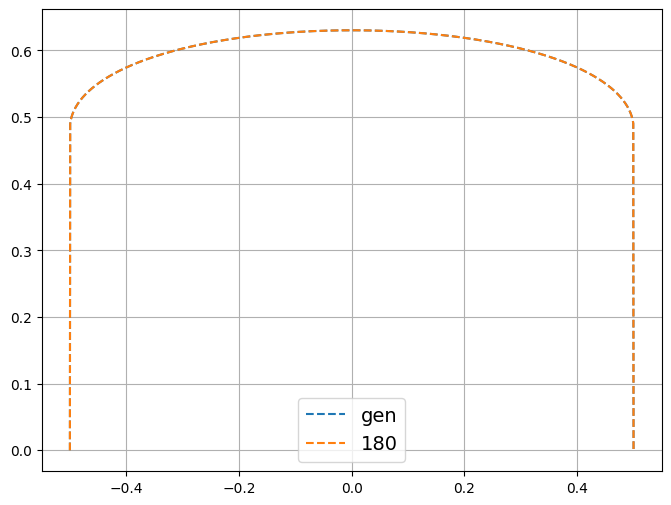

In [4]:
l = 8
phi = 0.6
z = np.linspace(-0.5, 0.5, 2000, endpoint=True)

rho_gen = rho_perforation(z, l, phi, np.deg2rad(180))
rho_180 = rho_perforation_180(z, l, phi)

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(z, rho_gen, '--', label='gen')
plt.plot(z, rho_180, '--', label='180')
plt.legend(fontsize=14)

print(np.trapz(rho_gen, z))
# print('S_gen:', np.trapz(rho_gen, z))
# print('S_180:', np.trapz(rho_180, z))
# print('Err:  ', np.trapz(np.abs(rho_gen - rho_180, z)))

---

# Вид профиля плотности при различных углах

S_90.1:  0.79920
S_100.1:  0.79921
S_110.1:  0.79922
S_120.1:  0.79923
S_130.1:  0.79924
S_140.0:  0.79925
S_150.0:  0.79927
S_160.0:  0.79928
S_170.0:  0.79930
S_180.0:  0.79933


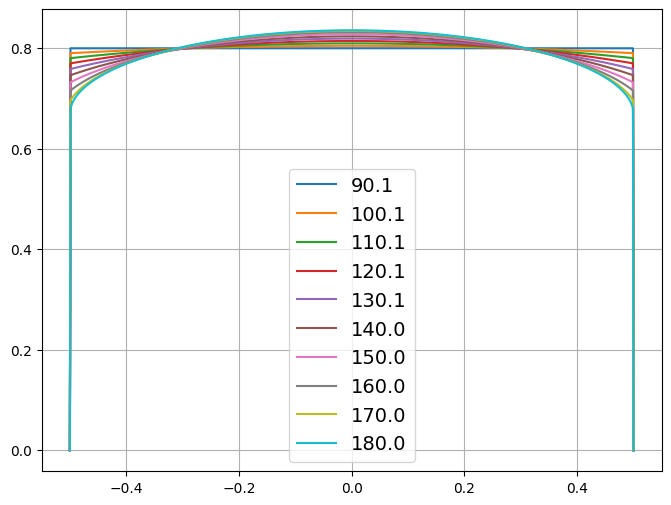

In [47]:
l = 6
phi = 0.8
z = np.linspace(-0.5, 0.5, 1000, endpoint=True)

theta = np.linspace(np.deg2rad(90.1), pi, 10)

plt.figure(figsize=(8, 6))
plt.grid()

for th in theta:
    rho = rho_roll(z, l, phi, th)
    plt.plot(z, rho, label='{:.1f}'.format(np.rad2deg(th)))
    print('S_{:.1f}:  {:.5f}'.format(np.rad2deg(th), np.trapz(rho, z)))

plt.legend(fontsize=14)
plt.show()

In [10]:
z = np.linspace(-0.5, 0.5, 1000, endpoint=True)
y = y_perforation(z, 3, 0.8, np.deg2rad(120))

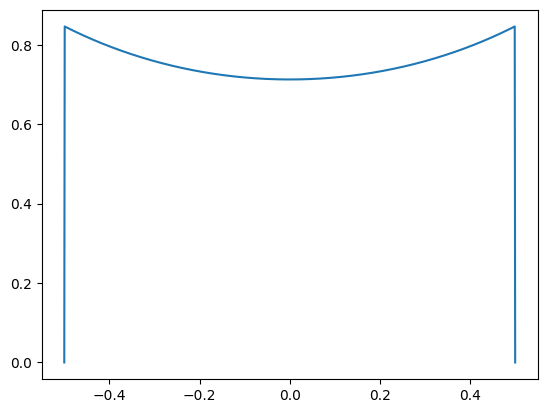

In [11]:
plt.plot(z, y)